In [82]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Load the data into a pandas DataFrame
df = pd.read_csv("data.csv")

# columns to include in the analysis
df.eq(0).sum()
mean_con = df[df['concavity_mean'] != 0]['concavity_mean'].mean()
mean_con_m = df[df['concave points_mean'] != 0]['concave points_mean'].mean()
mean_con_se = df[df['concavity_se'] != 0]['concavity_se'].mean()
mean_con_m_se = df[df['concave points_se'] != 0]['concave points_se'].mean()
mean_con_w = df[df['concavity_worst'] != 0]['concavity_worst'].mean()
mean_con_m_w = df[df['concave points_worst'] != 0]['concave points_worst'].mean()

df['concavity_mean'].replace(0, mean_con, inplace=True)
df['concave points_mean'].replace(0, mean_con_m, inplace=True)
df['concavity_se'].replace(0, mean_con_se, inplace=True)
df['concave points_se'].replace(0, mean_con_m_se, inplace=True)
df['concavity_worst'].replace(0, mean_con_w, inplace=True)
df['concave points_worst'].replace(0, mean_con_m_w, inplace=True)

data = df.drop(["id", "diagnosis", "Unnamed: 32"], axis=1)
data.dropna()
data_log[~data_log.isin([np.inf, -np.inf]).any(1)]

# Log transformation
data_log = np.log(data)
data_log.dropna(inplace=True)

# groups
group1 = data[df["diagnosis"] == "M"]
group2 = data[df["diagnosis"] == "B"]

# one way anova
statistic, pvalue = stats.f_oneway(group1, group2)

# Print the results
print("Statistic: ", statistic)
print("P-value: ", pvalue)

# Interpret the results
for i in range(len(pvalue)):
    if pvalue[i] < 0.05:
        print(f"The difference between the means of {data.columns[i]} is statistically significant.")
    else:
        print(f"The difference between the means of {data.columns[i]} is not statistically significant.")
            

Statistic:  [6.46981021e+02 1.18096059e+02 6.97235272e+02 5.73060747e+02
 8.36511234e+01 3.13233079e+02 5.04900406e+02 8.16968551e+02
 6.95274435e+01 9.34592949e-02 2.68840327e+02 3.90947023e-02
 2.53897392e+02 2.43651586e+02 2.55796780e+00 5.32473391e+01
 3.39866723e+01 1.02118523e+02 2.41174067e-02 3.46827476e+00
 8.60781707e+02 1.49596905e+02 8.97944219e+02 6.61600206e+02
 1.22472880e+02 3.04341063e+02 4.12953992e+02 9.46450235e+02
 1.18860232e+02 6.64439606e+01]
P-value:  [8.46594057e-096 4.05863605e-025 8.43625104e-101 4.73456431e-088
 1.05185036e-018 3.93826311e-056 1.90367692e-080 5.89390066e-112
 5.73338403e-016 7.59936804e-001 9.73894866e-050 8.43332029e-001
 1.65190518e-047 5.89552139e-046 1.10296609e-001 9.97599465e-013
 9.32039909e-009 3.46496300e-022 8.76641818e-001 6.30735508e-002
 8.48229192e-116 1.07805749e-030 5.77139714e-119 2.82884770e-097
 6.57514363e-026 7.06981635e-055 2.21591159e-069 5.57524880e-123
 2.95112058e-025 2.31643245e-015]
The difference between the mea

0      2.889816
1      3.023834
2      2.980111
3      2.435366
4      3.010128
         ...   
564    3.070840
565    3.002211
566    2.809403
567    3.025291
568    2.048982
Name: radius_mean, Length: 569, dtype: float64


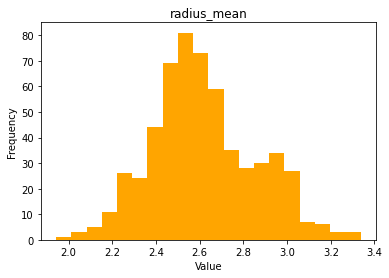

0      2.339881
1      2.877512
2      3.056357
3      3.014554
4      2.663053
         ...   
564    3.108614
565    3.341093
566    3.335058
567    3.378611
568    3.200304
Name: texture_mean, Length: 569, dtype: float64


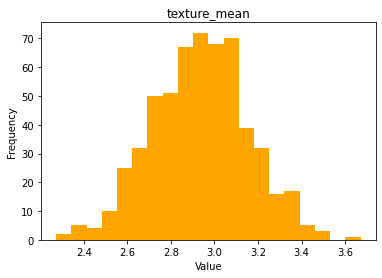

0      4.810557
1      4.889597
2      4.867534
3      4.351310
4      4.906015
         ...   
564    4.955827
565    4.876723
566    4.684905
567    4.942356
568    3.869533
Name: perimeter_mean, Length: 569, dtype: float64


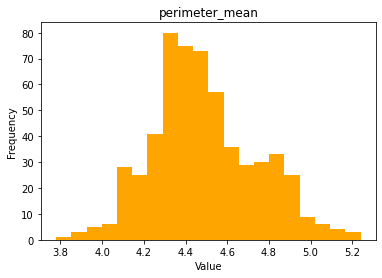

0      6.908755
1      7.189922
2      7.092574
3      5.956096
4      7.167809
         ...   
564    7.299121
565    7.139660
566    6.754721
567    7.142827
568    5.198497
Name: area_mean, Length: 569, dtype: float64


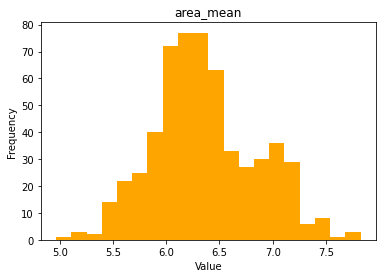

0     -2.133687
1     -2.468168
2     -2.210918
3     -1.948413
4     -2.299590
         ...   
564   -2.198225
565   -2.324831
566   -2.470412
567   -2.138767
568   -2.944469
Name: smoothness_mean, Length: 569, dtype: float64


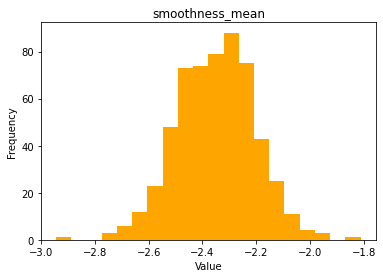

0     -1.281574
1     -2.542875
2     -1.833207
3     -1.259133
4     -2.018911
         ...   
564   -2.155028
565   -2.269150
566   -2.279846
567   -1.283738
568   -3.132240
Name: compactness_mean, Length: 569, dtype: float64


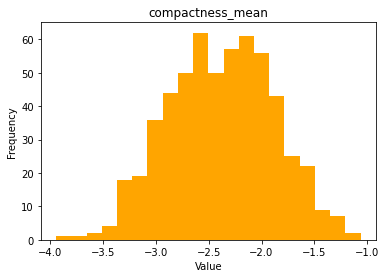

0     -1.203640
1     -2.442997
2     -1.622523
3     -1.421300
4     -1.619488
         ...   
564   -1.410997
565   -1.937942
566   -2.380439
567   -1.045830
568   -2.398264
Name: concavity_mean, Length: 569, dtype: float64


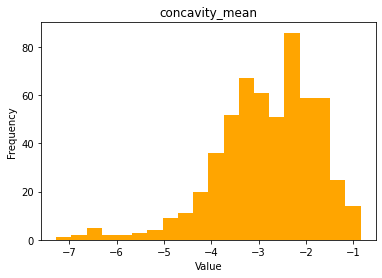

0     -1.916643
1     -2.656834
2     -2.056507
3     -2.251892
4     -2.260484
         ...   
564   -1.974001
565   -2.323707
566   -2.937086
567   -1.883875
568   -2.994474
Name: concave points_mean, Length: 569, dtype: float64


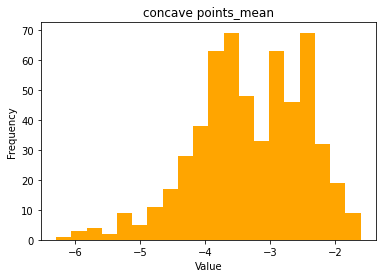

0     -1.419231
1     -1.708154
2     -1.575520
3     -1.348228
4     -1.709811
         ...   
564   -1.756779
565   -1.741827
566   -1.838851
567   -1.428367
568   -1.840740
Name: symmetry_mean, Length: 569, dtype: float64


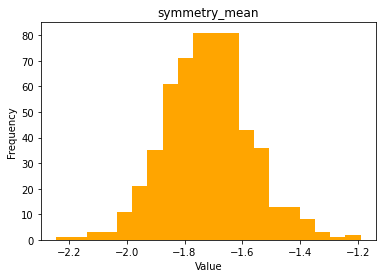

0     -2.541985
1     -2.870510
2     -2.813577
3     -2.328518
4     -2.833103
         ...   
564   -2.878305
565   -2.894440
566   -2.873869
567   -2.656977
568   -2.832933
Name: fractal_dimension_mean, Length: 569, dtype: float64


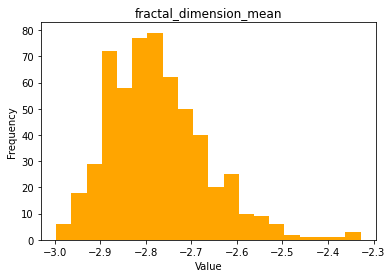

0      0.090754
1     -0.609726
2     -0.293566
3     -0.701986
4     -0.278128
         ...   
564    0.162119
565   -0.267226
566   -0.784386
567   -0.320205
568   -0.952695
Name: radius_se, Length: 569, dtype: float64


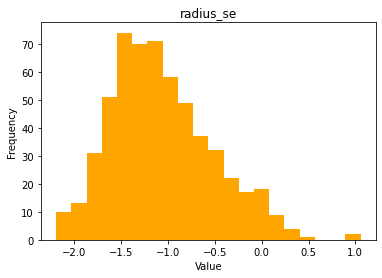

0     -0.099489
1     -0.309382
2     -0.239654
3      0.144966
4     -0.246796
         ...   
564    0.227932
565    0.901380
566    0.072321
567    0.466874
568    0.356275
Name: texture_se, Length: 569, dtype: float64


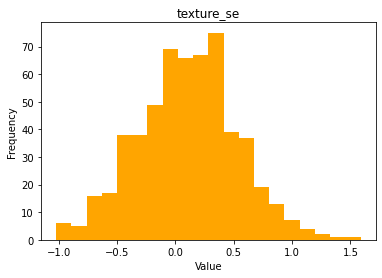

0      2.150482
1      1.223187
2      1.522790
3      1.236924
4      1.693411
         ...   
564    2.037708
565    1.649235
566    1.231101
567    1.753019
568    0.935309
Name: perimeter_se, Length: 569, dtype: float64


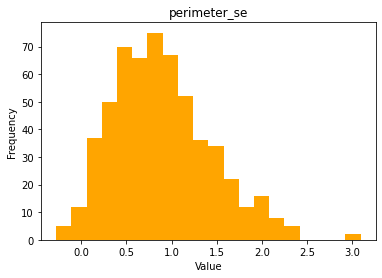

0      5.033049
1      4.305146
2      4.543614
3      3.304319
4      4.547965
         ...   
564    5.067016
565    4.595524
566    3.882594
567    4.456902
568    2.952303
Name: area_se, Length: 569, dtype: float64


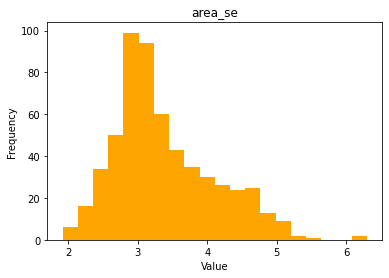

0     -5.051614
1     -5.254300
2     -5.091303
3     -4.698383
4     -4.466278
         ...   
564   -4.575611
565   -5.155257
566   -5.132295
567   -5.032574
568   -4.935203
Name: smoothness_se, Length: 569, dtype: float64


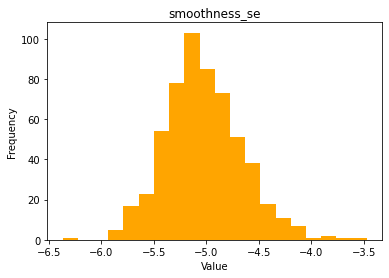

0     -3.015119
1     -4.336671
2     -3.217377
3     -2.595883
4     -3.704602
         ...   
564   -3.543568
565   -3.720164
566   -3.288494
567   -2.787418
568   -5.368740
Name: compactness_se, Length: 569, dtype: float64


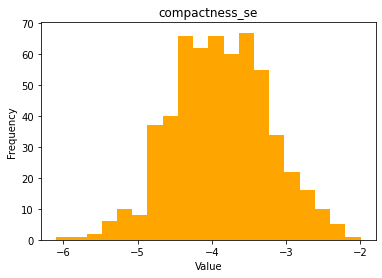

0     -2.923784
1     -3.984594
2     -3.261783
3     -2.871570
4     -2.866811
         ...   
564   -2.956896
565   -3.231455
566   -3.051245
567   -2.642684
568   -3.422234
Name: concavity_se, Length: 569, dtype: float64


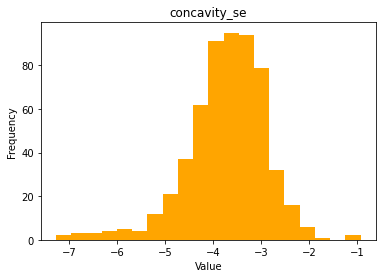

0     -4.143325
1     -4.312501
2     -3.883436
3     -3.980837
4     -3.971242
         ...   
564   -3.707451
565   -4.087568
566   -4.162409
567   -4.095946
568   -4.416871
Name: concave points_se, Length: 569, dtype: float64


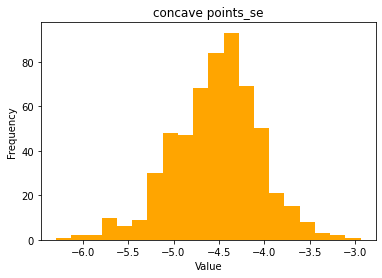

0     -3.505558
1     -4.276586
2     -3.794240
3     -2.819596
4     -4.042132
         ...   
564   -4.497213
565   -3.964369
566   -4.329055
567   -3.761880
568   -3.620847
Name: symmetry_se, Length: 569, dtype: float64


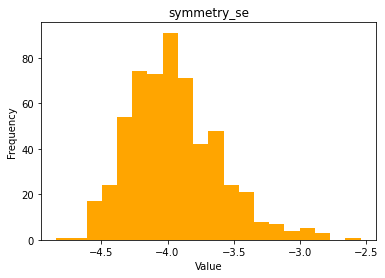

0     -5.084336
1     -5.645891
2     -5.388023
3     -4.687683
4     -5.275578
         ...   
564   -5.463428
565   -5.992265
566   -5.548832
567   -5.085628
568   -5.884226
Name: fractal_dimension_se, Length: 569, dtype: float64


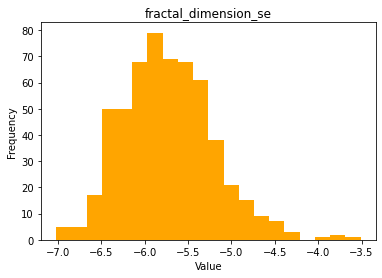

0      3.233961
1      3.218476
2      3.159975
3      2.702032
4      3.115292
         ...   
564    3.236716
565    3.165053
566    2.943386
567    3.248046
568    2.246649
Name: radius_worst, Length: 569, dtype: float64


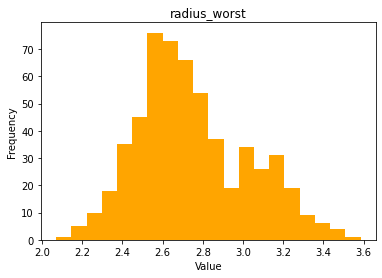

0      2.852439
1      3.153163
2      3.239854
3      3.277145
4      2.813611
         ...   
564    3.273364
565    3.644144
566    3.529884
567    3.674273
568    3.413455
Name: texture_worst, Length: 569, dtype: float64


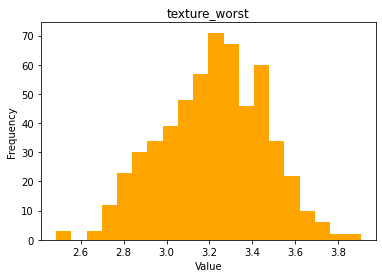

0      5.218191
1      5.067646
2      5.027165
3      4.593806
4      5.025195
         ...   
564    5.112590
565    5.043425
566    4.841822
567    5.218191
568    4.080246
Name: perimeter_worst, Length: 569, dtype: float64


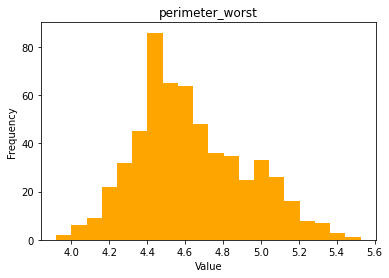

0      7.610358
1      7.578657
2      7.443664
3      6.341593
4      7.362011
         ...   
564    7.614312
565    7.456455
566    7.024649
567    7.507141
568    5.593223
Name: area_worst, Length: 569, dtype: float64


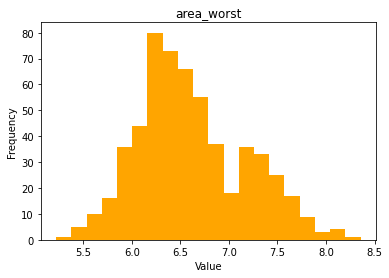

0     -1.818925
1     -2.089088
2     -1.935168
3     -1.561601
4     -1.984859
         ...   
564   -1.958995
565   -2.149006
566   -2.172434
567   -1.801810
568   -2.408390
Name: smoothness_worst, Length: 569, dtype: float64


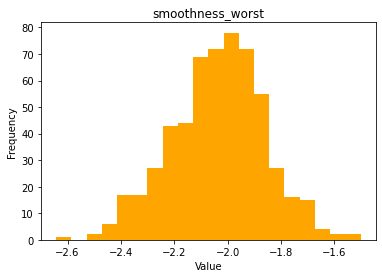

0     -0.407066
1     -1.678788
2     -0.856843
3     -0.143524
4     -1.584745
         ...   
564   -1.554476
565   -1.649219
566   -1.173120
567   -0.141448
568   -2.742021
Name: compactness_worst, Length: 569, dtype: float64


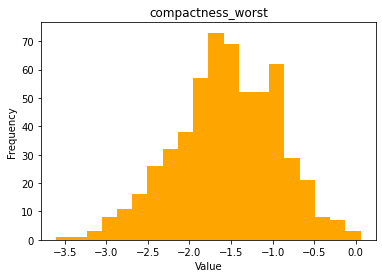

0     -0.339818
1     -1.420472
2     -0.797619
3     -0.375567
4     -0.916291
         ...   
564   -0.889892
565   -1.134758
566   -1.077928
567   -0.063259
568   -1.278148
Name: concavity_worst, Length: 569, dtype: float64


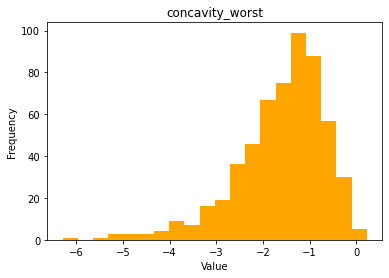

0     -1.326517
1     -1.682009
2     -1.414694
3     -1.356736
4     -1.817077
         ...   
564   -1.506881
565   -1.815233
566   -1.953338
567   -1.328025
568   -2.143141
Name: concave points_worst, Length: 569, dtype: float64


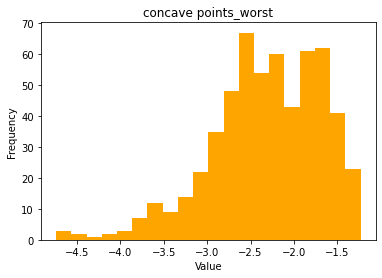

0     -0.776311
1     -1.290984
2     -1.018047
3     -0.409774
4     -1.442230
         ...   
564   -1.579879
565   -1.357901
566   -1.505979
567   -0.894774
568   -1.247925
Name: symmetry_worst, Length: 569, dtype: float64


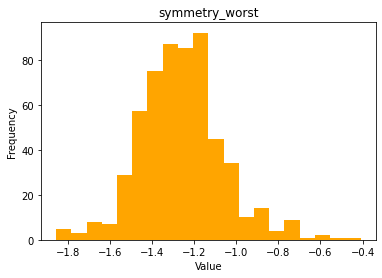

0     -2.129472
1     -2.418894
2     -2.435203
3     -1.754464
4     -2.566811
         ...   
564   -2.642965
565   -2.712510
566   -2.548486
567   -2.087474
568   -2.653704
Name: fractal_dimension_worst, Length: 569, dtype: float64


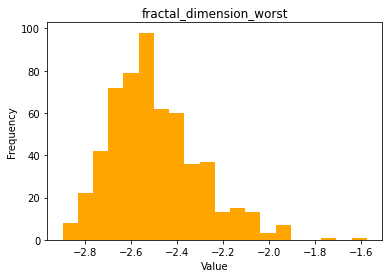

In [83]:
import matplotlib.pyplot as plt

# Set the number of bins
n_bins = 20

# Loop through each column and plot the histogram
for column in data_log.columns:
    print(data_log[column])
    plt.hist(data_log[column], bins=n_bins, color='orange')
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.title(column)
    plt.show()